In [1]:
# 必要なライブラリ
import pandas as pd # 前処理
import numpy as np  # 前処理
import matplotlib.pyplot as plt # 散布図と回帰直線
from sklearn import linear_model # 最小二乗法による線形回帰分析

In [2]:
# ローデータ.csvの読込
raw_data = pd.read_csv('example_OLS.csv', encoding = 'shift-jis')
raw_data

,英語,数学
0,35,32
1,60,60
2,80,58
3,65,55
4,60,60
5,41,45
6,22,33
7,85,87
8,75,91
9,90,95


In [3]:
# 目的変数(英語)の平均値を求める。
raw_data['英語'].mean()

58.03846153846154

In [4]:
# 目的変数(英語)の中央値を求める。
raw_data['英語'].median()

60.0

In [5]:
# 平均 ≒ 中央値と目視確認した為、散布図を描画する。
# パラメータ設定
x = raw_data['数学']
y = raw_data['英語']
a, b = np.polyfit(x, y, 1)

In [6]:
# 回帰直線の定義
y2 = a * x + b

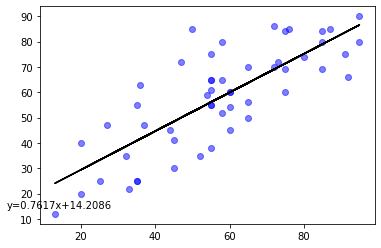

In [7]:
# 散布図を描画し、回帰直線を引く。
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y,alpha=0.5,color="Blue",linewidths="1")
ax.plot(x, y2,color='black')
ax.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
plt.show()

In [8]:
# 相関関係に仮説を立てることができた為、最小二乗法による線形単回帰分析を行う。
# 最小二乗法の定義
clf = linear_model.LinearRegression()
X = raw_data.loc[:,['数学']].values
Y = raw_data['英語'].values
clf.fit(X,Y)

LinearRegression()

回帰係数= [0.76174855]
切片： 14.20862210818423
R^2= 0.6240110620015379


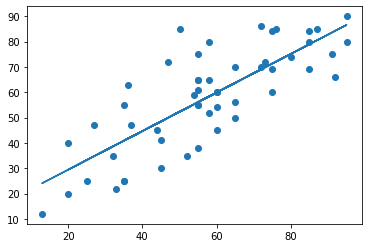

In [9]:
# 回帰分析結果の出力
print("回帰係数=", clf.coef_)
print("切片：",clf.intercept_)
print("R^2=",clf.score(X, Y))
plt.scatter(X, Y)
plt.plot(X, clf.predict(X)) # 回帰直線を引く。